In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# set seed for reproducibility
np.random.seed(0)

#data read with first 5 rows
data=pd.read_csv('/kaggle/input/customer-segmentation/AB_NYC_2019.csv')




# **Cleaning Data**

Data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete
data within a dataset. 


**Data Integrity**:

Ensuring the accuracy, consistency, and reliability of data throughout the cleaning process.We firstly explore our data by loading and looking for missing values

In [39]:
data.head()
#Looking for missing values
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [42]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

id                      0
name                   16
host_id                 0
host_name              21
neighbourhood_group     0
neighbourhood           0
latitude                0
longitude               0
room_type               0
price                   0
dtype: int64

In [43]:
#check for column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Missing Data Handling**:

Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset. We'll accomplish this by finding out the amount of missing data and fix it by replacing all NAN's with the value that comes directly after it in the same column and replacing the remaining nan's with 0 


In [44]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

#only a few cells(3%) of the dataset is empty

2.574521934758155

In [45]:
# get a small subset of the airbnb dataset
subset_data = data.loc[:, 'name':'calculated_host_listings_count'].head()
subset_data

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1


In [46]:
# replace all NAN's the value that comes directly after it in the same column, 
# then replace all the reamining nan's with 0
subset_data.fillna(method = 'bfill', axis=0).fillna(0)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-07-05,4.64,1
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1


**Duplicate Removal**: 

Identifying and eliminating duplicate records to maintain data
uniqueness.


In [30]:
#data Duplication
data.duplicated().sum()

#Result shows that there are no duplicate values present.


0

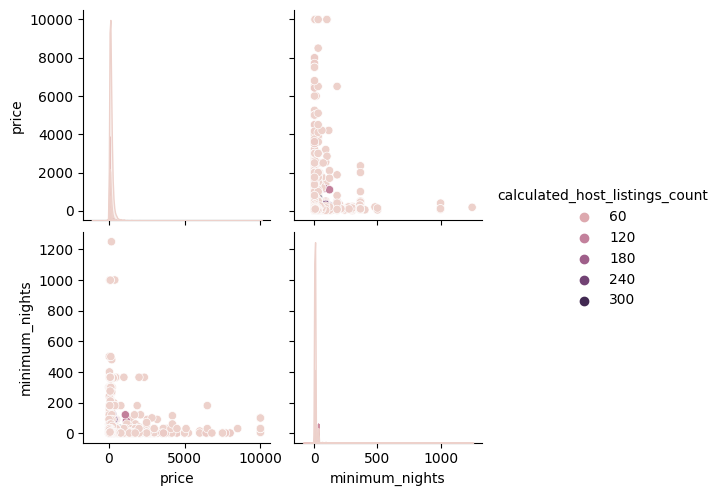

In [31]:
#Price vs minimum nights 
data.sample(10)
sns.pairplot(data ,  vars=['price' , 'minimum_nights'] , hue='calculated_host_listings_count')

<Axes: xlabel='price'>

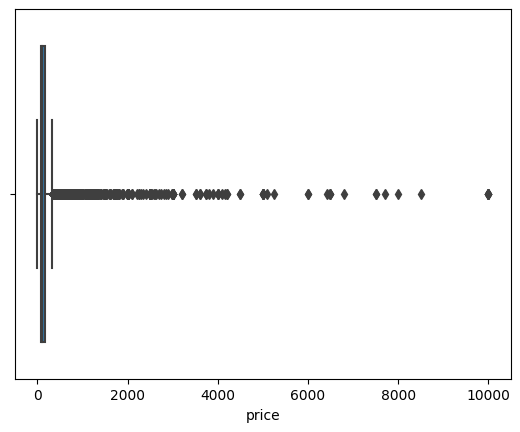

In [32]:
sns.boxplot(data= data , x = 'price')



**Standardization**:

Consistent formatting and units across the dataset for accurate analysis.

In [35]:
# Select relevant columns for analysis
airbnb_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                     'calculated_host_listings_count', 'availability_365']
selected_data = data[airbnb_columns]



In [36]:
# Standardize the numerical columns using z-score standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(selected_data)

# Create a DataFrame with standardized data
standardized_df = pd.DataFrame(standardized_data, columns=airbnb_columns)

# Analysis of standardized data
print("Mean of standardized data:")
print(standardized_df.mean())
print("\nStandard deviation of standardized data:")
print(standardized_df.std())

Mean of standardized data:
price                             3.720195e-17
minimum_nights                    1.104433e-17
number_of_reviews                 1.860098e-17
reviews_per_month                 1.170732e-17
calculated_host_listings_count   -1.860098e-17
availability_365                  0.000000e+00
dtype: float64

Standard deviation of standardized data:
price                             1.000010
minimum_nights                    1.000010
number_of_reviews                 1.000010
reviews_per_month                 1.000013
calculated_host_listings_count    1.000010
availability_365                  1.000010
dtype: float64


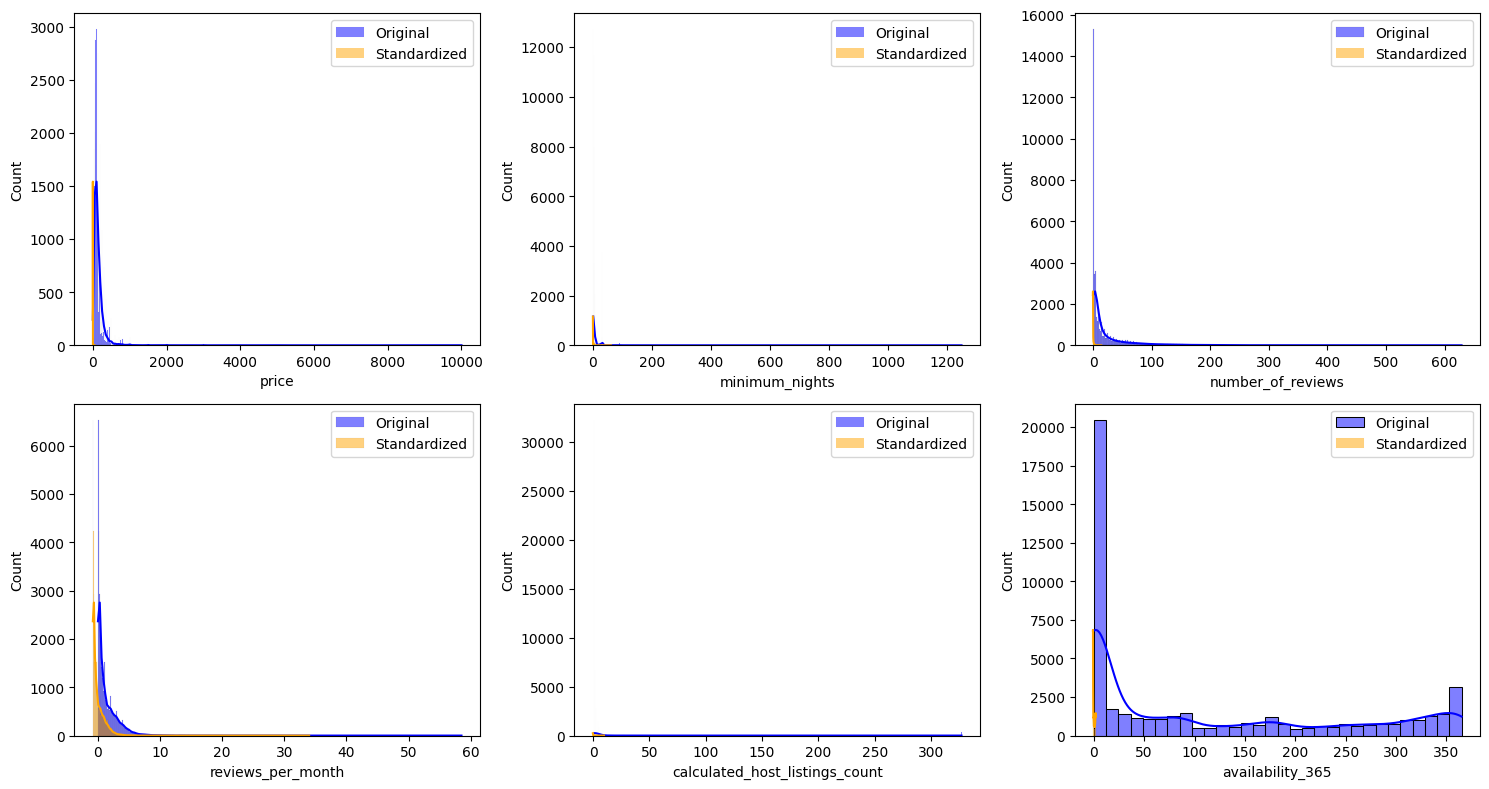

In [38]:
data_standardized = data.copy()
data_standardized[airbnb_columns] = (data[airbnb_columns] - data[airbnb_columns].mean()) / data[airbnb_columns].std()

plt.figure(figsize=(15, 8))

for i, column in enumerate(airbnb_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, color='blue', label='Original', alpha=0.5)
    sns.histplot(data_standardized[column], kde=True, color='orange', label='Standardized', alpha=0.5)
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

**Outlier Detection**: 

Identifying and addressing outliers that may skew analysis or model
performance

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       38843.000000   
mean     152.720687        7.029962          23.274466           1.373221   
std      240.154170       20.510550          44.550582           1.680442   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.190000   
50%      106.000000        3.000000           5.000000           0.720000   
75%      175.000000        5.000000          24.000000           2.020000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%             

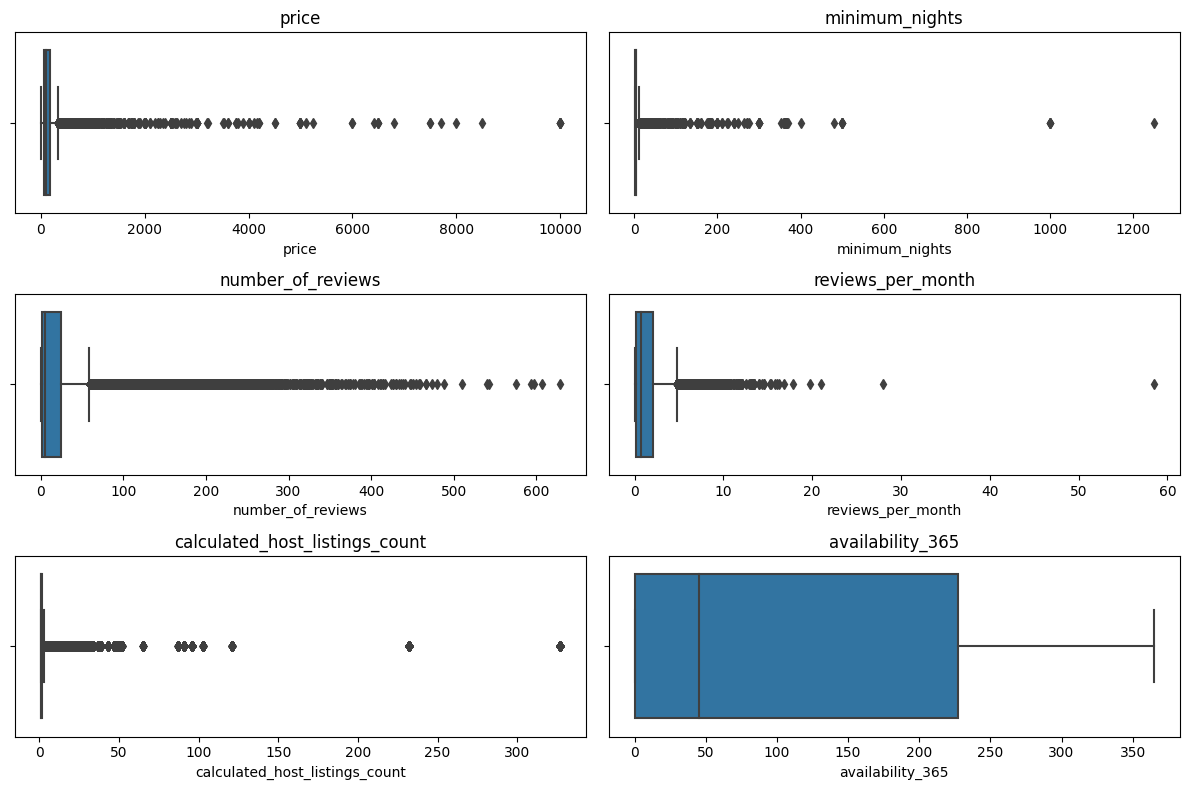

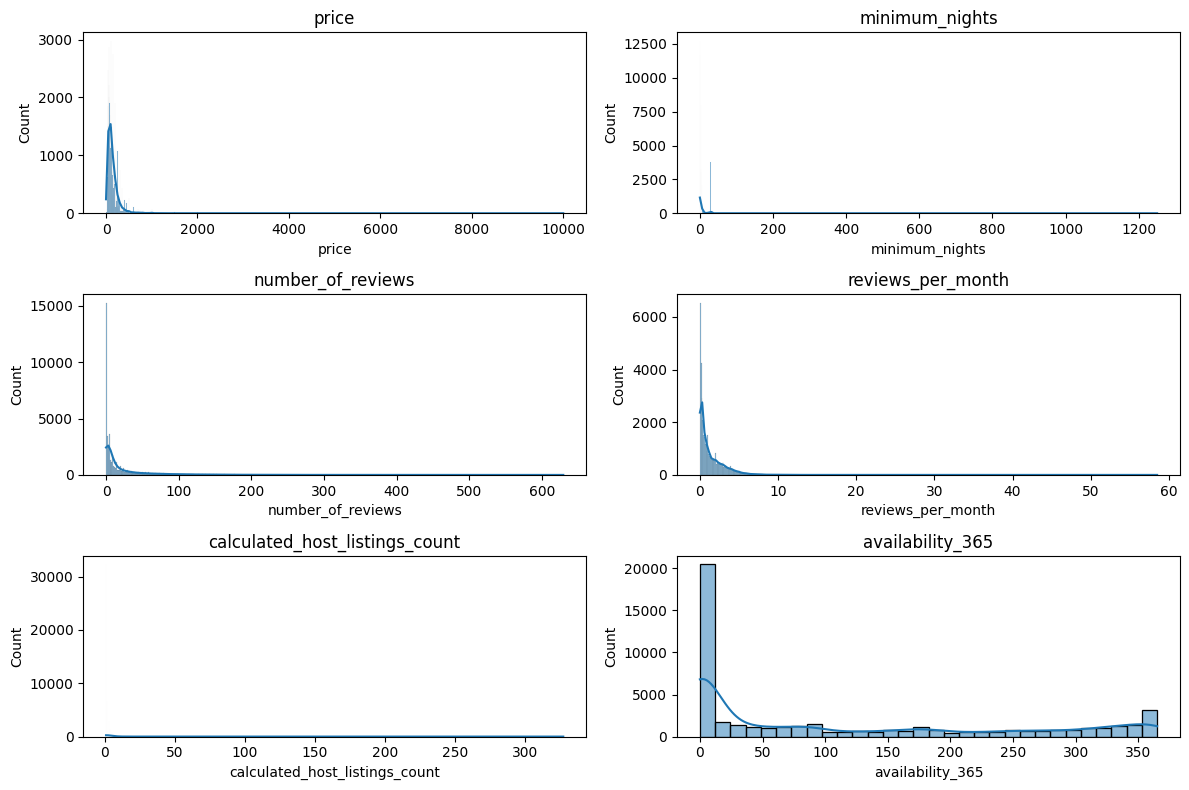

Outliers:
price                             2972
minimum_nights                    6607
number_of_reviews                 6021
reviews_per_month                 1793
calculated_host_listings_count    7081
availability_365                     0
dtype: int64


In [47]:
# Select numerical columns for outlier detection
airbnb_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365']

# Summary statistics
summary_stats = data[airbnb_columns].describe()
print(summary_stats)

# Interquartile range (IQR) method for outlier detection
Q1 = data[airbnb_columns].quantile(0.25)
Q3 = data[airbnb_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers detection
outliers = (data[airbnb_columns] < lower_bound) | (data[airbnb_columns] > upper_bound)

# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(airbnb_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualize distributions using histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(airbnb_columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Display outliers
print("Outliers:")
print(outliers.sum())